<a href="https://colab.research.google.com/github/softmurata/colab_notebooks/blob/main/segmentation/U2Seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/u2seg/U2Seg.git
%cd /content/U2Seg
!pip install -e .

In [ ]:
# !pip install pillow==9.5
# !pip install git+https://github.com/cocodataset/panopticapi.git

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1LFyl5WBJ_SNoWBEyRM-IM1vLmRGYeIfd/view?usp=drive_link

In [2]:
!mkdir /content/U2Seg/ckpts
!cp /content/imagenetcoco_800_model_9000.pth /content/U2Seg/ckpts/

In [ ]:
%cd /content/U2Seg
!python ./demo/u2seg_demo.py --config-file configs/COCO-PanopticSegmentation/u2seg_eval_800.yaml --input demo/images/*jpg --output results/demo_800

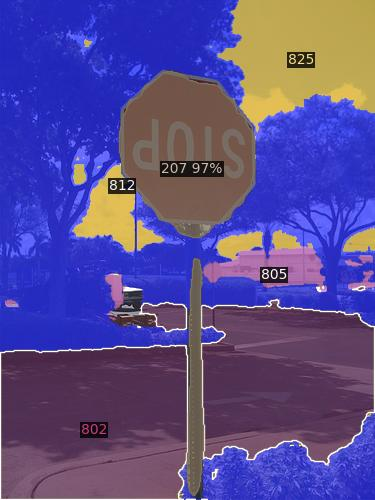

In [4]:
from PIL import Image
display(Image.open("/content/U2Seg/results/demo_800/000000000724.jpg"))

Custom Inference

In [7]:
%%writefile /content/U2Seg/demo/custom_demo.py
import argparse
from detectron2.config import get_cfg
from detectron2.data.detection_utils import read_image
from detectron2.utils.logger import setup_logger

from predictor import VisualizationDemo

def setup_cfg(args):
    # load config from file and command-line arguments
    cfg = get_cfg()
    # To use demo for Panoptic-DeepLab, please uncomment the following two lines.
    # from detectron2.projects.panoptic_deeplab import add_panoptic_deeplab_config  # noqa
    # add_panoptic_deeplab_config(cfg)
    cfg.merge_from_file(args.config_file)
    cfg.merge_from_list(args.opts)
    # Set score_threshold for builtin models
    cfg.MODEL.RETINANET.SCORE_THRESH_TEST = args.confidence_threshold
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = args.confidence_threshold
    cfg.MODEL.PANOPTIC_FPN.COMBINE.INSTANCES_CONFIDENCE_THRESH = args.confidence_threshold
    cfg.freeze()
    return cfg


def get_parser():
    parser = argparse.ArgumentParser(description="Detectron2 demo for builtin configs")
    parser.add_argument(
        "--config-file",
        default="configs/COCO-PanopticSegmentation/u2seg_eval.yaml",
        metavar="FILE",
        help="path to config file",
    )
    parser.add_argument(
        "--hungarian_matching",
        default=False,
        metavar="FILE",
        help="path to config file",
    )

    parser.add_argument("--webcam", action="store_true", help="Take inputs from webcam.")
    parser.add_argument("--video-input", help="Path to video file.")
    parser.add_argument(
        "--input_path",
        type=str,
        default = "/content/U2Seg/demo/images/000000000724.jpg" # your images
    )
    parser.add_argument(
        "--output_path",
        type=str,
        help="A file or directory to save output visualizations. "
        "If not given, will show output in an OpenCV window.",
        default="/content/output.jpg"
    )

    parser.add_argument(
        "--confidence-threshold",
        type=float,
        default=0.5,
        help="Minimum score for instance predictions to be shown",
    )
    parser.add_argument(
        "--opts",
        help="Modify config options using the command-line 'KEY VALUE' pairs",
        default=[],
        nargs=argparse.REMAINDER,
    )
    return parser


if __name__ == "__main__":
  args = get_parser().parse_args()
  setup_logger(name="fvcore")
  logger = setup_logger()
  logger.info("Arguments: " + str(args))

  cfg = setup_cfg(args)

  demo = VisualizationDemo(cfg)



  img = read_image(args.input_path, format="BGR")
  predictions, visualized_output = demo.run_on_image(img)


  visualized_output.save(args.output_path)

Writing /content/U2Seg/demo/custom_demo.py


In [ ]:
!wget https://img.freepik.com/free-photo/living-room-in-scandinavian-interior-design_53876-146865.jpg -O /content/room.jpg

In [ ]:
%cd /content/U2Seg
!python ./demo/custom_demo.py --config-file configs/COCO-PanopticSegmentation/u2seg_eval_800.yaml --input_path /content/room.jpg  --output_path /content/result.jpg

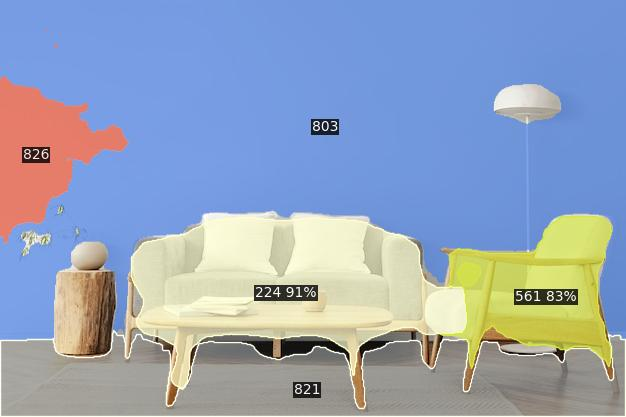

In [11]:
from PIL import Image
display(Image.open("/content/result.jpg"))